In [27]:
import numpy as np
import pandas as pd
import json
from urllib.request import urlopen
import sqlite3
import string

import seaborn as sns
import matplotlib.pyplot as plt

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
from ast import literal_eval

In [88]:
def handle_nan(y) :
    try :
        return literal_eval(y)


    except Exception as e:
        y = y.replace("nan", "0")
        return literal_eval(y)

In [109]:
data_speakers = pd.read_csv('data/speaker_attribute.bz2',  compression='bz2')

In [110]:
data_speakers.columns
columns_eval = ['occupation','religion']

In [111]:
data_speakers[columns_eval] = data_speakers[columns_eval].applymap(handle_nan)

In [112]:
data_speakers.head(10)

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,id,label,candidacy,religion,climate,skeptic
0,['+1732-02-22T00:00:00Z'],"['Great Britain', 'United States of America']",['male'],[],"[politician, slaveholder, farmer, engineer, ca...",['independent politician'],[],Q23,George Washington,"['1792 United States presidential election', '...",[Episcopal Church],0,0
1,['+1952-03-11T00:00:00Z'],['United Kingdom'],['male'],['White British'],"[novelist, science fiction writer, children's ...",[],[],Q42,Douglas Adams,[],[],0,0
2,['+1868-08-23T00:00:00Z'],['Belgium'],['male'],[],"[bibliographer, lawyer, inventor, information ...",[],[],Q1868,Paul Otlet,[],[],0,0
3,['+1946-07-06T00:00:00Z'],['United States of America'],['male'],[],"[autobiographer, painter, financier, politicia...",['Republican Party'],[],Q207,George W. Bush,"['2000 United States presidential election', '...","[United Methodist Church, Episcopal Church, Me...",1,1
4,['+1599-06-06T00:00:00Z'],['Spain'],['male'],[],[painter],[],[],Q297,Diego Velázquez,[],[],0,0
5,['+1915-11-25T00:00:00Z'],['Chile'],['male'],[],"[politician, military officer]",['independent politician'],[],Q368,Augusto Pinochet,[],[Catholicism],0,0
6,['+1821-04-09T00:00:00Z'],['France'],['male'],['French'],"[literary critic, poet, author, art critic, es...",[],[],Q501,Charles Baudelaire,[],[Catholicism],0,0
7,['+1473-02-19T00:00:00Z'],['Kingdom of Poland'],['male'],['Poles'],"[physician, mathematician, astronomer, jurist,...",[],[],Q619,Nicolaus Copernicus,[],[Catholicism],0,0
8,['+1945-11-12T00:00:00Z'],"['Canada', 'United States of America']",['male'],[],"[autobiographer, singer-songwriter, actor, gui...",[],[],Q633,Neil Young,[],[],0,0
9,['+1969-00-00T00:00:00Z'],['Germany'],['male'],[],"[photographer, Wikimedian]",[],[],Q640,Harald Krichel,[],[],0,0


In [113]:
test = data_speakers.occupation.head(10**5)
test.explode()

0                         politician
0                        slaveholder
0                             farmer
0                           engineer
0                       cartographer
                    ...             
99996    association football player
99997             university teacher
99997                     translator
99998              volleyball player
99999             military personnel
Name: occupation, Length: 181329, dtype: object

In [20]:
column_to_evaluate = [""]

99990                                   ['actor']
99991    ['literary critic', "children's writer"]
99992                              ['journalist']
99993                                  ['writer']
99994                                   ['actor']
99995                                   ['actor']
99996             ['association football player']
99997        ['university teacher', 'translator']
99998                       ['volleyball player']
99999                      ['military personnel']
Name: occupation, dtype: object

In [83]:
def remove_nan(y) :
    try :
        return literal_eval(y)


    except Exception as e:
        y = y.replace("nan", "0")
        return literal_eval(y)
    

def values_for_plot(x) : 
    return x.map(remove_nan).explode().value_counts()

In [86]:
test = data_speakers.occupation.head(10**5)

plot = values_for_plot(test)

AttributeError: 'function' object has no attribute 'explode'

In [ ]:
plot = test.map(remove_nan).explode().value_counts()

In [76]:
test_2 = data_speakers.occupation.head((10**5))
test_2.tail()

99995                               ['actor']
99996         ['association football player']
99997    ['university teacher', 'translator']
99998                   ['volleyball player']
99999                  ['military personnel']
Name: occupation, dtype: object

In [78]:
test_2= test_2.map(remove_nan).explode()
test_2.tail()

99996    association football player
99997             university teacher
99997                     translator
99998              volleyball player
99999             military personnel
Name: occupation, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'politician'),
  Text(1, 0, 'writer'),
  Text(2, 0, 'association football player'),
  Text(3, 0, 'university teacher'),
  Text(4, 0, 'actor'),
  Text(5, 0, 'film actor'),
  Text(6, 0, 'painter'),
  Text(7, 0, 'journalist'),
  Text(8, 0, 'singer'),
  Text(9, 0, 'composer'),
  Text(10, 0, 'screenwriter'),
  Text(11, 0, 'Catholic priest'),
  Text(12, 0, 'poet'),
  Text(13, 0, 'lawyer'),
  Text(14, 0, 'television actor'),
  Text(15, 0, 'author'),
  Text(16, 0, 'film director'),
  Text(17, 0, 'stage actor'),
  Text(18, 0, 'military personnel'),
  Text(19, 0, 'historian'),
  Text(20, 0, 'musician'),
  Text(21, 0, 'diplomat'),
  Text(22, 0, 'ice hockey player'),
  Text(23, 0, 'theologian'),
  Text(24, 0, 'association football manager'),
  Text(25, 0, 'architect'),
  Text(26, 0, 'film producer'),
  Text(27, 0, 'sport cyclist'),
  Text(28, 0, 'sc

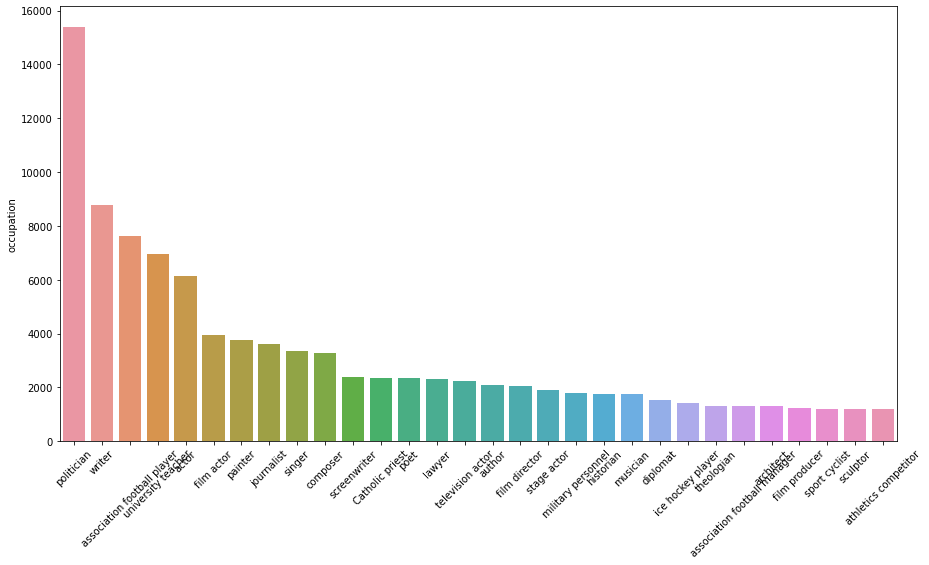

In [70]:
plot_h = plot.head(30)
plt.figure(figsize=(15, 8))
sns.barplot(x= plot_h.index, y = plot_h)
plt.xticks(rotation = 45)

In [71]:
#data_speakers.occupation = data_speakers.occupation.map(remove_nan).explode()

ValueError: cannot reindex from a duplicate axis